<a href="https://colab.research.google.com/github/oztuka/IS584CourseTermProject/blob/main/notebooks/Preliminary_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 584: Deep Learning for Text Analytics

# Term Project

**Preliminary Results and Benchmarking**

**Özkan Tuğberk Kartal**

**2481117**

The following codes are written regarding Creating Dataset and Preliminary Results and Benchmarking:

# Creating Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gdown
import zipfile
import os
from pathlib import Path
import re
import json
import shutil

def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(r'(\d+)', s)]

def get_pandas_data_from(filenames):
  data_list = []
  for filename in filenames:
    try:
      with open(filename, 'r') as file:
        # json_normalize is used to flatten the nested dicts
        # this will increase the number of total columns of data
        data_list.append(pd.json_normalize(json.load(file)))
    except: # ignore erroneous json file data
      pass
  return pd.concat(data_list, ignore_index=True)

print("pandas.__version__: " + pd.__version__)
print("gdown.__version__: " + gdown.__version__)
print("re.__version__: " + re.__version__)
print("json.__version__: " + json.__version__)

data_zip_download_file_url = f"https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75"

output_zip_file_name = "dataset.zip"

gdown.download(data_zip_download_file_url, output_zip_file_name, quiet = False)

# extract ZIP file
with zipfile.ZipFile(output_zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("dataset")

pandas.__version__: 2.2.2
gdown.__version__: 5.2.0
re.__version__: 2.2.1
json.__version__: 2.0.9


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75
From (redirected): https://drive.google.com/uc?export=download&id=1nJdljy468roUcKLbVwWUhMs7teirah75&confirm=t&uuid=de0c44b5-028d-44b4-9840-082f0b22ed9c
To: /content/dataset.zip
100%|██████████| 235M/235M [00:05<00:00, 45.4MB/s]


In [2]:
# get root_folder
root_folder = Path("dataset/dataset")

ICLR_content_files = []
ICLR_paper_files = []
ICLR_review_files = []
NIPS_content_files = []
NIPS_paper_files = []
NIPS_review_files = []

# Iterate over all subdirectories and files
for file in root_folder.rglob('*content.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_content_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_content_files.append(str(file.parent) + "/" + file.name)
for file in root_folder.rglob('*paper.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_paper_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_paper_files.append(str(file.parent) + "/" + file.name)
for file in root_folder.rglob('*review.json'):
    # Check if the word "ICLR" is in the file name
    if 'ICLR' in file.name:
        ICLR_review_files.append(str(file.parent) + "/" + file.name)
    elif 'NIPS' in file.name:
        NIPS_review_files.append(str(file.parent) + "/" + file.name)

ICLR_content_files = sorted(ICLR_content_files, key = natural_sort_key)
ICLR_paper_files = sorted(ICLR_paper_files, key = natural_sort_key)
ICLR_review_files = sorted(ICLR_review_files, key = natural_sort_key)
NIPS_content_files = sorted(NIPS_content_files, key = natural_sort_key)
NIPS_paper_files = sorted(NIPS_paper_files, key = natural_sort_key)
NIPS_review_files = sorted(NIPS_review_files, key = natural_sort_key)

ICLR_content_data = get_pandas_data_from(ICLR_content_files)
ICLR_paper_data = get_pandas_data_from(ICLR_paper_files)
ICLR_review_data = get_pandas_data_from(ICLR_review_files)
NIPS_content_data = get_pandas_data_from(NIPS_content_files)
NIPS_paper_data = get_pandas_data_from(NIPS_paper_files)
NIPS_review_data = get_pandas_data_from(NIPS_review_files)

# basing upon id of the items, merge each ICLR and NIPS data into one by replacing
# missing column values with NaN by using 'how' = 'outer'
ICLR_data = pd.merge(pd.merge(ICLR_content_data, ICLR_paper_data, on='id', how='outer'), ICLR_review_data, on='id', how='outer')
NIPS_data = pd.merge(pd.merge(NIPS_content_data, NIPS_paper_data, on='id', how='outer'), NIPS_review_data, on='id', how='outer')

# concatenate ICLR_data and NIPS_data
data = pd.concat([ICLR_data, NIPS_data], ignore_index=True)

# ICLR_data, NIPS_data and data can be processed in the future

print("ICLR_content_files count: " + str(len(ICLR_content_files)))
print("ICLR_content_data.shape: " + str(ICLR_content_data.shape))
print("ICLR_content_data.columns: " + str(ICLR_content_data.columns))
print(" ")
print("ICLR_paper_files count: " + str(len(ICLR_paper_files)))
print("ICLR_paper_data.shape: " + str(ICLR_paper_data.shape))
print("ICLR_paper_data.columns: " + str(ICLR_paper_data.columns))
print(" ")
print("ICLR_review_files count: " + str(len(ICLR_review_files)))
print("ICLR_review_data.shape: " + str(ICLR_review_data.shape))
print("ICLR_review_data.columns: " + str(ICLR_review_data.columns))
print(" ")
print("ICLR_data.shape: " + str(ICLR_data.shape))
print("ICLR_data.columns: " + str(ICLR_data.columns))
print(" ")
print(" ")

print("NIPS_content_files count: " + str(len(NIPS_content_files)))
print("NIPS_content_data.shape: " + str(NIPS_content_data.shape))
print("NIPS_content_data.columns: " + str(NIPS_content_data.columns))
print(" ")
print("NIPS_paper_files count: " + str(len(NIPS_paper_files)))
print("NIPS_paper_data.shape: " + str(NIPS_paper_data.shape))
print("NIPS_paper_data.columns: " + str(NIPS_paper_data.columns))
print(" ")
print("NIPS_review_files count: " + str(len(NIPS_review_files)))
print("NIPS_review_data.shape: " + str(NIPS_review_data.shape))
print("NIPS_review_data.columns: " + str(NIPS_review_data.columns))
print(" ")
print("NIPS_data.shape: " + str(NIPS_data.shape))
print("NIPS_data.columns: " + str(NIPS_data.columns))
print(" ")
print(" ")

print("data.shape: " + str(data.shape))
print("data.columns: " + str(data.columns))
print(" ")
print(" ")


ICLR_content_files count: 5171
ICLR_content_data.shape: (5171, 12)
ICLR_content_data.columns: Index(['name', 'id', 'metadata.source', 'metadata.title', 'metadata.authors',
       'metadata.emails', 'metadata.sections', 'metadata.references',
       'metadata.referenceMentions', 'metadata.year', 'metadata.abstractText',
       'metadata.creator'],
      dtype='object')
 
ICLR_paper_files count: 5192
ICLR_paper_data.shape: (5192, 8)
ICLR_paper_data.columns: Index(['id', 'conference', 'decision', 'url', 'hasContent', 'hasReview',
       'title', 'authors'],
      dtype='object')
 
ICLR_review_files count: 5178
ICLR_review_data.shape: (5178, 3)
ICLR_review_data.columns: Index(['id', 'reviews', 'metaReview'], dtype='object')
 
ICLR_data.shape: (5194, 21)
ICLR_data.columns: Index(['name', 'id', 'metadata.source', 'metadata.title', 'metadata.authors',
       'metadata.emails', 'metadata.sections', 'metadata.references',
       'metadata.referenceMentions', 'metadata.year', 'metadata.abstractT

ICLR data first ten rows are 
                name             id metadata.source  \
0    ICLR_2017_1.pdf    ICLR_2017_1             CRF   
1   ICLR_2017_10.pdf   ICLR_2017_10             CRF   
2  ICLR_2017_100.pdf  ICLR_2017_100             CRF   
3  ICLR_2017_101.pdf  ICLR_2017_101             CRF   
4  ICLR_2017_102.pdf  ICLR_2017_102             CRF   
5  ICLR_2017_103.pdf  ICLR_2017_103             CRF   
6  ICLR_2017_104.pdf  ICLR_2017_104             CRF   
7  ICLR_2017_105.pdf  ICLR_2017_105             CRF   
8  ICLR_2017_106.pdf  ICLR_2017_106             CRF   
9  ICLR_2017_107.pdf  ICLR_2017_107             CRF   

                                      metadata.title  \
0  MAKING NEURAL PROGRAMMING ARCHITECTURES GENERA...   
1  Q-PROP: SAMPLE-EFFICIENT POLICY GRADIENT WITH ...   
2  INTROSPECTION:ACCELERATING NEURAL NETWORK TRAI...   
3        HYPERBAND: BANDIT-BASED CONFIGURATION EVAL-   
4                  LIE-ACCESS NEURAL TURING MACHINES   
5                    QUASI-R

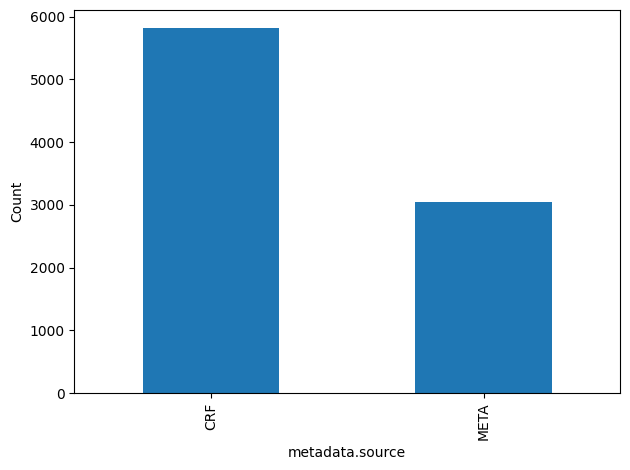

 
 
 
 
 
For the column 'metadata.title', there are 5459 unique values which are given by
['MAKING NEURAL PROGRAMMING ARCHITECTURES GENERALIZE VIA RECURSION'
 'Q-PROP: SAMPLE-EFFICIENT POLICY GRADIENT WITH AN OFF-POLICY CRITIC'
 'INTROSPECTION:ACCELERATING NEURAL NETWORK TRAINING BY LEARNING WEIGHT EVOLUTION'
 ... 'Distributional Reward Decomposition for Reinforcement Learning'
 'Learning to Perform Local Rewriting for Combinatorial Optimization'
 'Bayesian Learning of Sum-Product Networks']
 
 and the following unique values occur more than once
metadata.title
RECURRENT NEURAL NETWORKS                                                           5
DEEP REINFORCEMENT LEARNING                                                         3
CONVOLUTIONAL NEURAL NETWORKS                                                       3
DEEP NEURAL NETWORKS                                                                3
Launch and Iterate: Reducing Prediction Churn                                       2
M

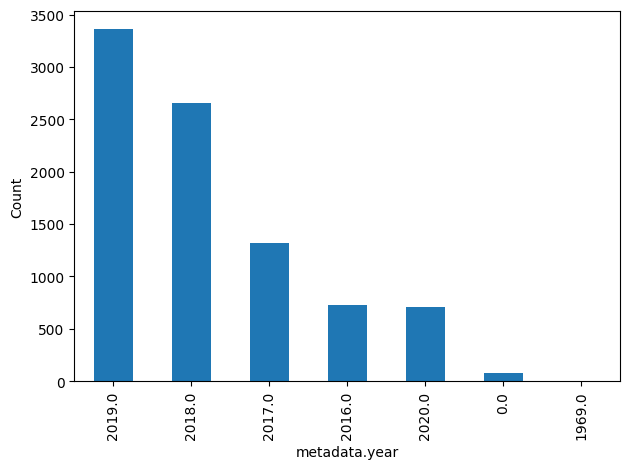

 
 
 
 
 
For the column 'metadata.abstractText', there are 8844 unique values which are given by
['Empirically, neural networks that attempt to learn programs from data have exhibited poor generalizability. Moreover, it has traditionally been difficult to reason about the behavior of these models beyond a certain level of input complexity. In order to address these issues, we propose augmenting neural architectures with a key abstraction: recursion. As an application, we implement recursion in the Neural Programmer-Interpreter framework on four tasks: grade-school addition, bubble sort, topological sort, and quicksort. We demonstrate superior generalizability and interpretability with small amounts of training data. Recursion divides the problem into smaller pieces and drastically reduces the domain of each neural network component, making it tractable to prove guarantees about the overall system’s behavior. Our experience suggests that in order for neural architectures to robustly le

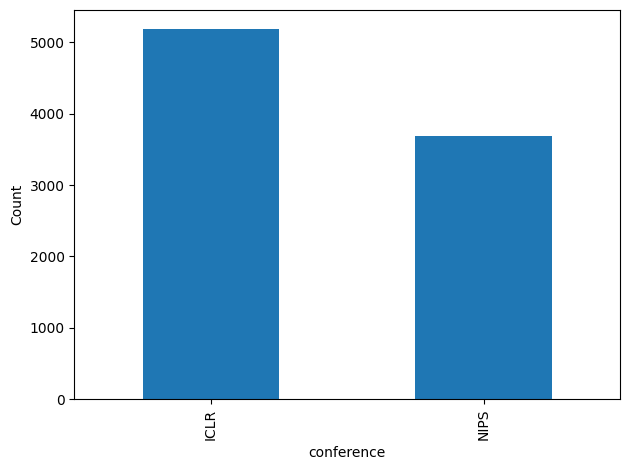

 
 
 
 
 
For the column 'decision', there are 8 unique values which are given by
['Accept (Oral)' 'Accept (Poster)' 'Invite to Workshop Track' 'Reject' nan
 'Accept (Spotlight)' 'Accept (Talk)' 'Accept']
 
 and histogram of this column is given by 


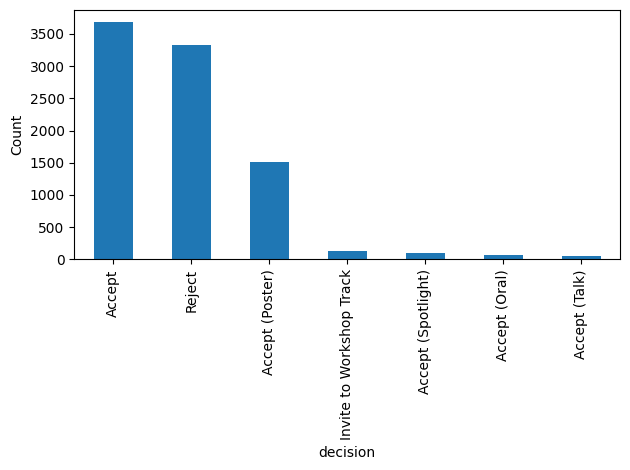

 
 
 
 
 
For the column 'url', there are 8878 unique values which are given by
['http://openreview.net/pdf/342543971002b3e5f08be11d9a6da60b594a6b47.pdf'
 'http://openreview.net/pdf/c210ff1a4868a532ec87ee0da3c6e4254ee567fb.pdf'
 'http://openreview.net/pdf/f5316305b0560db063525a71f36ca95d1932981e.pdf'
 ...
 'http://papers.nips.cc/paper/9291-region-mutual-information-loss-for-semantic-segmentation.pdf'
 'http://papers.nips.cc/paper/9292-learning-stable-deep-dynamics-models.pdf'
 'http://papers.nips.cc/paper/9293-image-captioning-transforming-objects-into-words.pdf']
 
 
 
 
 
For the column 'hasContent', there are 3 unique values which are given by
['true' 'false' nan]
 
 and histogram of this column is given by 


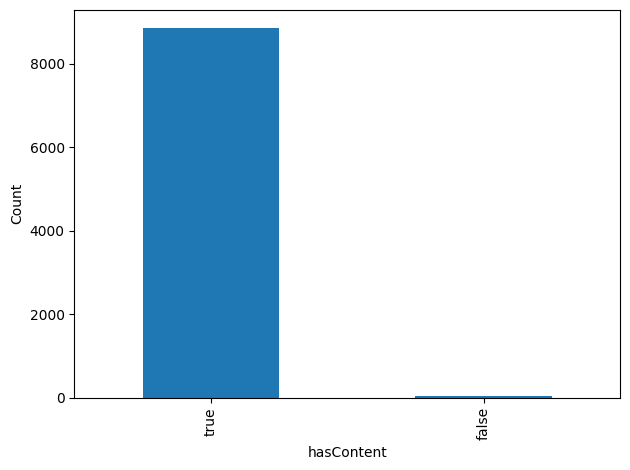

 
 
 
 
 
For the column 'hasReview', there are 3 unique values which are given by
['true' nan 'false']
 
 and histogram of this column is given by 


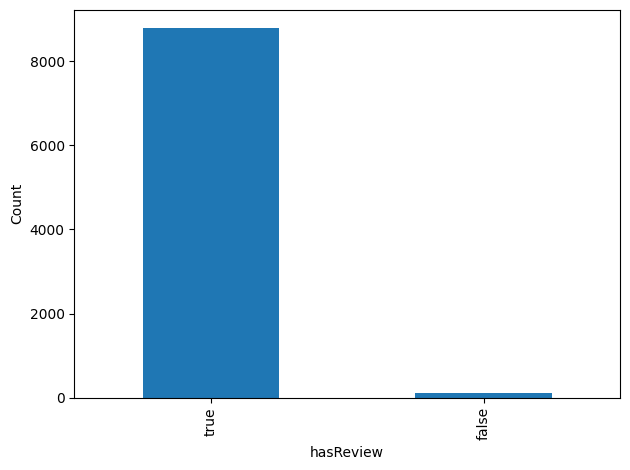

 
 
 
 
 
For the column 'title', there are 8826 unique values which are given by
['Making Neural Programming Architectures Generalize via Recursion'
 'Q-Prop: Sample-Efficient Policy Gradient with An Off-Policy Critic'
 'Introspection:Accelerating Neural Network Training By Learning Weight Evolution'
 ... 'Region Mutual Information Loss for Semantic Segmentation'
 'Learning Stable Deep Dynamics Models'
 'Image Captioning: Transforming Objects into Words']
 
 and the following unique values occur more than once
title
NA                                                                                  6
N/A                                                                                 3
Visualizing the Loss Landscape of Neural Nets                                       2
Prototypical Networks for Few-shot Learning                                         2
#Exploration: A Study of Count-Based Exploration for Deep Reinforcement Learning    2
Double Neural Counterfactual Regret Minimizatio

<ipython-input-3-b2b5655fe57b>:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  NIPS_data_serialized = NIPS_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)
<ipython-input-3-b2b5655fe57b>:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean = data_serialized.applymap(remove_illegal_chars)


In [3]:
print("ICLR data first ten rows are ")
print(ICLR_data.head(10))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")

print("NIPS data first ten rows are ")
print(NIPS_data.head(10))
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")

# os.makedirs('histograms', exist_ok=True)

for col_index in range(len(data.columns)):
  try:
    unique_values_if_applicable = data[data.columns[col_index]].unique()
  except:
    print("For the column '" + str(data.columns[col_index]) + "', data are given in the list format")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    continue
  print("For the column '" + str(data.columns[col_index]) + "', there are " + str(len(unique_values_if_applicable))+ " unique values which are given by")
  print(unique_values_if_applicable)
  value_counts = data[data.columns[col_index]].value_counts()
  occuring_more_than_once = value_counts[value_counts > 1]
  if len(unique_values_if_applicable) < 50:
    print(" ")
    print(" and histogram of this column is given by ")
    ax = value_counts.plot(kind='bar', xlabel=str(data.columns[col_index]), ylabel='Count', rot=90)
    plt.tight_layout()
    fig = ax.get_figure()
    # fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.eps', format='eps', dpi=300)
    # fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.jpeg', format='jpeg', dpi=300)
    # fig.savefig('histograms/' + str(data.columns[col_index]).replace(".", "_") + '_histogram.svg', format='svg', dpi=300)
    plt.show()
  elif len(occuring_more_than_once) > 0:
    print(" ")
    print(" and the following unique values occur more than once")
    print(occuring_more_than_once)
  print(" ")
  print(" ")
  print(" ")
  print(" ")
  print(" ")

# shutil.make_archive('histograms', 'zip', 'histograms')

# ICLR_data.to_pickle('ICLR_data.pkl')

# NIPS_data.to_pickle('NIPS_data.pkl')

# data.to_pickle('all_data.pkl')

# ICLR_data.to_csv('ICLR_data.csv')

# NIPS_data.to_csv('NIPS_data.csv')

# data.to_csv('all_data.csv')

ICLR_data_serialized = ICLR_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

NIPS_data_serialized = NIPS_data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

data_serialized = data.applymap(lambda x: json.dumps(x) if isinstance(x, (list, dict)) else x)

ILLEGAL_CHARACTERS_RE = re.compile(r'[\x00-\x1F]')

def remove_illegal_chars(value):
    if isinstance(value, str):
        return ILLEGAL_CHARACTERS_RE.sub('', value)
    else:
        return value

ICLR_data_clean = ICLR_data_serialized.applymap(remove_illegal_chars)
NIPS_data_clean = NIPS_data_serialized.applymap(remove_illegal_chars)
data_clean = data_serialized.applymap(remove_illegal_chars)

# ICLR_data_clean.to_excel('ICLR_data.xlsx')

# NIPS_data_clean.to_excel('NIPS_data.xlsx')

# data_clean.to_excel('all_data.xlsx')


# Preliminary Results

Importing remaining libraries

In [4]:
import numpy as np
from collections import Counter
import seaborn as sns
import random
import string
# Neural Network Architecture and Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
# Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
# Performance Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# WANDB
!pip install wandb
import wandb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Setting seed

In [5]:
seed = 34
print("seed = " + str(seed))
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
g = torch.Generator()
g.manual_seed(seed)
def seed_worker(worker_id):
    worker_seed = torch.initial_seed()
    np.random.seed(seed)
    random.seed(seed)
# incase pandas function involving randomness are used, then this seed value will be used

seed = 34


Stop Words and Punctuation

In [6]:
stop_words = set(stopwords.words('english'))
punct_table = str.maketrans('', '', string.punctuation)

Removing nan from Decision Parameters

In [7]:
data_clean = data_clean[pd.notna(data_clean['decision'])]

unique_labels = data_clean['decision'].unique()

output_len = len(unique_labels)

Dataset class where texts are composed of titles and meta reviews and stop words, punctuation, nan, None, NA and N/A values are ignored

In [8]:
Most_Common_Count = 20000
class ArticleDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.tokenizer = tokenizer
        self.texts = df.apply(
            lambda row: " ".join(
                word.lower()
                for val in [row.get('title'), row.get('metaReview')]
                if pd.notna(val) and str(val).strip().upper() not in {"NA", "N/A"}
                for word in word_tokenize(str(val).translate(punct_table))
                if word.lower() not in stop_words
            ),
            axis=1
        ).tolist()
        self.max_len = max(len(text) for text in self.texts)
        print("self.max_len: " + str(self.max_len))
        self.labels = df['decision'].tolist()
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.labels)
        self.vocab = self.build_vocab(self.texts)

    def build_vocab(self, texts):
        words = [word for text in texts for word in self.tokenizer(text.lower())]
        most_common = Counter(words).most_common(Most_Common_Count)
        vocab = {word: idx+2 for idx, (word, _) in enumerate(most_common)}  # 0=PAD, 1=UNK
        vocab['<PAD>'] = 0
        vocab['<UNK>'] = 1
        return vocab

    def encode_text(self, text):
        tokens = self.tokenizer(text.lower())
        return [self.vocab.get(token, 1) for token in tokens][:self.max_len]

    def pad_sequence(self, seq):
        return seq + [0] * (self.max_len - len(seq))

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoded = self.encode_text(self.texts[idx])
        padded = self.pad_sequence(encoded)
        return torch.tensor(padded), torch.tensor(self.labels[idx])

Capsule Layer Architecture

In [9]:
class CapsuleLayer(nn.Module):
    def __init__(self, num_capsules, dim_capsule, input_dim, input_len, routing_iters=3):
        super(CapsuleLayer, self).__init__()
        self.num_capsules = num_capsules
        self.dim_capsule = dim_capsule
        self.routing_iters = routing_iters
        # initializing weight randomly
        self.W = nn.Parameter(0.01 * torch.randn(1, input_len, num_capsules, dim_capsule, input_dim))

    def forward(self, x):
        x = x.unsqueeze(2).unsqueeze(4)
        u_hat = torch.einsum('bijhd,bijdf->bijhf',
                     self.W.expand(x.size(0), -1, -1, -1, -1),
                     x[:, :self.W.size(2), :, :, :].permute(0, 2, 1, 3, 4).expand(-1, self.W.size(1), -1, -1, -1))
        b_ij = torch.zeros_like(u_hat[:, :, :, 0])

        for r in range(self.routing_iters):
            c_ij = F.softmax(b_ij, dim=2)
            s_j = (c_ij.unsqueeze(3) * u_hat).sum(dim=1)
            v_j = self.squash(s_j)
            if r < self.routing_iters - 1:
                delta_b_ij = (u_hat * v_j.unsqueeze(1)).sum(dim=-1)
                b_ij = b_ij + delta_b_ij
        return v_j

    def squash(self, s):
        s_norm = torch.norm(s, dim=2, keepdim=True)
        return (s_norm**2 / (1 + s_norm**2)) * (s / (s_norm + 1e-8))

Combining Capsule Layer with 2 Convolutional Layers

In [10]:
class CapsNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim=32, input_dim=16, input_len=10, output_len = 2):
        super(CapsNet, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.conv1 = nn.Conv1d(embedding_dim, 64, kernel_size=9, stride=1)
        self.primary_caps = nn.Conv1d(64, input_dim * input_len, kernel_size=9, stride=2)
        self.dense_caps = CapsuleLayer(num_capsules=2, dim_capsule=16, input_dim=input_dim, input_len=input_len*6)
        for name, param in self.dense_caps.state_dict().items():
          print(f"{name}: shape = {param.shape}")
        self.linear = nn.Linear(512, output_len)
        self.input_dim = input_dim

    def forward(self, x):
        x = self.embedding(x).transpose(1, 2)
        x = F.relu(self.conv1(x))
        x = self.primary_caps(x).transpose(1, 2).contiguous()
        x = x.view(x.size(0), -1, self.input_dim)
        x = self.dense_caps(x)
        x = x.view(x.size(0), -1)
        return self.linear(x)

Confusion Matrix Related Visualization Function

In [11]:
def plot_confusion_matrix(cm, labels, output_dir):
    fig = plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
    wandb.log({"Confusion_Matrix": wandb.Image(fig)})
    plt.close()

Training Function

In [17]:
def train_model(model, train_loader, val_loader, epochs=10, lr=1e-3, output_dir="."):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in tqdm(range(epochs), desc="Epochs"):
        model.train()
        total_loss = 0
        for inputs, labels in tqdm(train_loader, desc="Training", unit="batch"):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print("Epoch " + str(epoch+1) + ", Loss: "  + str(total_loss))
        wandb.log({"epoch": epoch+1, "loss": total_loss})
        path = f"checkpoints/model_epoch_{epoch+1}.pth"
        torch.save(model.state_dict(), path)
        wandb_path = f"model_epoch_{epoch+1}.pth"
        wandb.save(path)
        evaluate(model, val_loader, output_dir)

Validation Function

In [13]:
def evaluate(model, loader, output_dir):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    all_preds, all_pred_classes, all_labels = [], [], []

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validation", unit="batch"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.softmax(outputs, dim=1)
            pred_classes = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_pred_classes.extend(pred_classes.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_pred_classes)
    f1 = f1_score(all_labels, all_pred_classes, average='weighted')
    auc = roc_auc_score(all_labels, all_preds, multi_class='ovr', average='weighted')
    cm = confusion_matrix(all_labels, all_pred_classes)
    print("Accuracy: " + str(acc) + ", F1 Score: " + str(f1) + ", AUC: " + str(auc))
    print("Confusion Matrix:\n", cm)
    wandb.log({"accuracy": acc, "f1_score": f1, "auc": auc})
    plot_confusion_matrix(cm, labels=unique_labels, output_dir=output_dir)

wandb initialiation

WANDB API KEY = 655b1cb95fef4a774eef6ab553f1d273a39c3a41

In [14]:
os.makedirs("outputs", exist_ok=True)
os.makedirs("checkpoints", exist_ok=True)
wandb.init(project="IS 584 Course Term Project", dir="outputs")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: eabu2ss (eabu2ss-metu-middle-east-technical-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Combining all previous classes and functions together

In [18]:
tokenizer = word_tokenize
dataset = ArticleDataset(data_clean, tokenizer)
train_idx, val_idx = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state = seed, stratify=dataset.labels)
train_set = torch.utils.data.Subset(dataset, train_idx)
val_set = torch.utils.data.Subset(dataset, val_idx)
batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, worker_init_fn=seed_worker, generator=g)
val_loader = DataLoader(val_set, batch_size=batch_size, worker_init_fn=seed_worker, generator=g)

input_dim = 3
input_len = 4

model = CapsNet(vocab_size=len(dataset.vocab), input_dim = input_dim, input_len = input_len, output_len = output_len)

lr = 1e-3

epochs = 50

train_model(model, train_loader, val_loader, epochs=epochs, lr=lr, output_dir="outputs")

wandb.finish()


self.max_len: 5290
W: shape = torch.Size([1, 24, 2, 16, 3])


Training: 100%|██████████| 56/56 [00:18<00:00,  3.03batch/s]


Epoch 1, Loss: 75.63790726661682



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.58batch/s]


Accuracy: 0.4341216216216216, F1 Score: 0.3281255117521996, AUC: 0.6804252848165874
Confusion Matrix:
 [[125   0   0   0   0   0 612]
 [  0   0   0   0   0   0  12]
 [ 12   0   0   0   0   0 289]
 [  0   0   0   0   0   0  22]
 [  0   0   0   0   0   0  10]
 [  4   0   0   0   0   0  23]
 [ 21   0   0   0   0   0 646]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.91batch/s]


Epoch 2, Loss: 65.75995671749115



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.90batch/s]


Accuracy: 0.5777027027027027, F1 Score: 0.5143355093076835, AUC: 0.7100047649086494
Confusion Matrix:
 [[481   0   0   0   0   0 256]
 [  3   0   0   0   0   0   9]
 [ 53   0   0   0   0   0 248]
 [  3   0   0   0   0   0  19]
 [  2   0   0   0   0   0   8]
 [ 10   0   0   0   0   0  17]
 [122   0   0   0   0   0 545]]


Training: 100%|██████████| 56/56 [00:18<00:00,  2.96batch/s]


Epoch 3, Loss: 58.40214377641678



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.87batch/s]


Accuracy: 0.6188063063063063, F1 Score: 0.5492612760423932, AUC: 0.7588985326425212
Confusion Matrix:
 [[586   0   0   0   0   0 151]
 [  5   0   0   0   0   0   7]
 [ 67   0   0   0   0   0 234]
 [  5   0   0   0   0   0  17]
 [  2   0   0   0   0   0   8]
 [ 11   0   0   0   0   0  16]
 [154   0   0   0   0   0 513]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.80batch/s]


Epoch 4, Loss: 53.04644465446472



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.77batch/s]


Accuracy: 0.6233108108108109, F1 Score: 0.5527796293569164, AUC: 0.7667353993188039
Confusion Matrix:
 [[597   0   0   0   0   0 140]
 [  5   0   0   0   0   0   7]
 [ 72   0   0   0   0   0 229]
 [  4   0   0   0   0   0  18]
 [  3   0   0   0   0   0   7]
 [ 10   0   0   0   0   0  17]
 [157   0   0   0   0   0 510]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.79batch/s]


Epoch 5, Loss: 48.498910427093506



Validation: 100%|██████████| 14/14 [00:03<00:00,  4.05batch/s]


Accuracy: 0.6266891891891891, F1 Score: 0.5583055166209688, AUC: 0.7652002949527471
Confusion Matrix:
 [[550   0   0   0   0   0 187]
 [  5   0   0   0   0   0   7]
 [ 53   0   0   0   0   0 248]
 [  2   0   0   0   0   0  20]
 [  2   0   0   0   0   0   8]
 [ 10   0   0   0   0   0  17]
 [104   0   0   0   0   0 563]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.80batch/s]


Epoch 6, Loss: 44.49198001623154



Validation: 100%|██████████| 14/14 [00:03<00:00,  4.43batch/s]


Accuracy: 0.6199324324324325, F1 Score: 0.5553735710209744, AUC: 0.7575464080732178
Confusion Matrix:
 [[551   0   1   0   0   0 185]
 [  5   0   0   0   0   0   7]
 [ 57   0   3   0   0   0 241]
 [  2   0   0   0   0   0  20]
 [  2   0   0   0   0   0   8]
 [  9   0   0   0   0   0  18]
 [115   0   5   0   0   0 547]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.82batch/s]


Epoch 7, Loss: 39.40107053518295



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.95batch/s]


Accuracy: 0.5974099099099099, F1 Score: 0.5399048873461625, AUC: 0.7510858109816336
Confusion Matrix:
 [[605   0  10   0   0   0 122]
 [  4   0   1   0   0   0   7]
 [ 85   0   8   0   0   0 208]
 [  9   0   0   0   0   0  13]
 [  3   0   0   0   0   0   7]
 [  9   0   0   0   0   0  18]
 [187   0  32   0   0   0 448]]


Training: 100%|██████████| 56/56 [00:17<00:00,  3.12batch/s]


Epoch 8, Loss: 34.30833277106285



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.92batch/s]


Accuracy: 0.589527027027027, F1 Score: 0.5497829945782591, AUC: 0.7487683465475337
Confusion Matrix:
 [[552   0  23   0   0   0 162]
 [  4   0   0   0   0   0   8]
 [ 63   0  24   0   0   0 214]
 [  5   0   1   0   0   0  16]
 [  2   0   0   0   0   0   8]
 [  8   0   3   0   0   0  16]
 [139   0  57   0   0   0 471]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.76batch/s]


Epoch 9, Loss: 29.824122369289398



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.98batch/s]


Accuracy: 0.5844594594594594, F1 Score: 0.5576082943859029, AUC: 0.7466389937385443
Confusion Matrix:
 [[542   0  40   0   0   0 155]
 [  4   0   0   0   0   0   8]
 [ 57   0  42   0   0   0 202]
 [  5   0   1   0   0   0  16]
 [  3   0   0   0   0   0   7]
 [  8   0   3   0   0   0  16]
 [123   0  90   0   0   0 454]]


Training: 100%|██████████| 56/56 [00:18<00:00,  3.07batch/s]


Epoch 10, Loss: 25.492875069379807



Validation: 100%|██████████| 14/14 [00:03<00:00,  4.23batch/s]


Accuracy: 0.5720720720720721, F1 Score: 0.5481261156711744, AUC: 0.741045435742888
Confusion Matrix:
 [[587   0  38   0   0   2 110]
 [  4   0   1   0   0   0   7]
 [ 75   0  54   0   0   1 171]
 [  7   0   3   0   0   0  12]
 [  3   0   0   0   0   0   7]
 [  9   0   4   0   0   0  14]
 [168   0 121   0   0   3 375]]


Training: 100%|██████████| 56/56 [00:18<00:00,  2.97batch/s]


Epoch 11, Loss: 21.536451905965805



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.92batch/s]


Accuracy: 0.5658783783783784, F1 Score: 0.5464346005597698, AUC: 0.7393803350740488
Confusion Matrix:
 [[559   0  44   0   0   1 133]
 [  4   0   1   0   0   0   7]
 [ 74   0  62   0   0   1 164]
 [  7   0   3   0   0   0  12]
 [  3   0   0   0   0   0   7]
 [  8   0   6   0   0   0  13]
 [156   0 125   0   0   2 384]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.92batch/s]


Epoch 12, Loss: 17.560611307621002



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.97batch/s]


Accuracy: 0.5489864864864865, F1 Score: 0.5463741514930356, AUC: 0.7408380158251007
Confusion Matrix:
 [[529   0  67   0   0   7 134]
 [  3   0   3   0   0   0   6]
 [ 58   0  92   0   0   5 146]
 [  5   0   5   0   0   1  11]
 [  3   0   1   0   0   0   6]
 [  8   0   4   0   0   1  14]
 [119   0 189   0   0   6 353]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.92batch/s]


Epoch 13, Loss: 13.420203134417534



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.57batch/s]


Accuracy: 0.5484234234234234, F1 Score: 0.5378259224308498, AUC: 0.7304685470342525
Confusion Matrix:
 [[529   0  50   0   0  10 148]
 [  4   0   4   0   0   0   4]
 [ 65   0  61   0   0   3 172]
 [  6   0   1   0   0   1  14]
 [  3   0   0   0   0   0   7]
 [  8   0   4   0   0   1  14]
 [128   0 147   0   0   9 383]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.94batch/s]


Epoch 14, Loss: 11.063472889363766



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.91batch/s]


Accuracy: 0.5394144144144144, F1 Score: 0.534137007679281, AUC: 0.7256083501222551
Confusion Matrix:
 [[543   0  61   0   0  11 122]
 [  4   0   4   0   0   0   4]
 [ 72   0  95   1   0   6 127]
 [  5   0   5   0   0   1  11]
 [  3   0   3   0   0   0   4]
 [  9   0   6   0   0   0  12]
 [151   0 186   0   0  10 320]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.93batch/s]


Epoch 15, Loss: 9.318254373967648



Validation: 100%|██████████| 14/14 [00:02<00:00,  5.04batch/s]


Accuracy: 0.5275900900900901, F1 Score: 0.5242687827171851, AUC: 0.7268112781069982
Confusion Matrix:
 [[537   0  64   6   0   9 121]
 [  4   0   3   0   0   0   5]
 [ 66   0  80   3   0   5 147]
 [  4   0   4   0   0   1  13]
 [  3   0   2   0   0   0   5]
 [  9   0   4   0   0   1  13]
 [147   0 184   4   0  13 319]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.77batch/s]


Epoch 16, Loss: 8.586215063929558



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.93batch/s]


Accuracy: 0.5512387387387387, F1 Score: 0.5351210099550686, AUC: 0.7265547717240919
Confusion Matrix:
 [[533   0  39   3   0   5 157]
 [  4   0   1   0   0   0   7]
 [ 64   0  53   1   0   5 178]
 [  5   0   1   0   0   1  15]
 [  3   0   0   0   0   0   7]
 [ 10   0   2   0   0   0  15]
 [140   0 127   1   0   6 393]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.79batch/s]


Epoch 17, Loss: 8.140931662172079



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.98batch/s]


Accuracy: 0.5444819819819819, F1 Score: 0.5386437962052415, AUC: 0.7243526408013048
Confusion Matrix:
 [[546   0  49   2   0  12 128]
 [  4   0   3   0   0   0   5]
 [ 67   0  81   1   0   6 146]
 [  5   0   4   0   0   1  12]
 [  4   0   0   0   0   0   6]
 [  6   0   5   0   0   2  14]
 [143   0 166   3   0  17 338]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.77batch/s]


Epoch 18, Loss: 7.049520835280418



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.98batch/s]


Accuracy: 0.5506756756756757, F1 Score: 0.5388382834081212, AUC: 0.7274615777593499
Confusion Matrix:
 [[561   0  42   0   0  12 122]
 [  4   0   1   0   0   0   7]
 [ 70   0  72   0   0  12 147]
 [  6   0   3   0   0   0  13]
 [  5   0   0   0   0   0   5]
 [  9   0   3   0   0   0  15]
 [160   0 150   0   0  12 345]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.88batch/s]


Epoch 19, Loss: 5.5560886189341545



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.34batch/s]


Accuracy: 0.5456081081081081, F1 Score: 0.5321360876135157, AUC: 0.7261182791994188
Confusion Matrix:
 [[551   0  36   0   0   9 141]
 [  5   0   2   0   0   0   5]
 [ 72   0  66   0   0  11 152]
 [  7   0   2   0   0   0  13]
 [  4   0   0   0   0   1   5]
 [  9   0   2   0   0   0  16]
 [162   0 139   0   0  14 352]]


Training: 100%|██████████| 56/56 [00:18<00:00,  2.97batch/s]


Epoch 20, Loss: 4.5722747799009085



Validation: 100%|██████████| 14/14 [00:05<00:00,  2.44batch/s]


Accuracy: 0.5512387387387387, F1 Score: 0.5441972447432588, AUC: 0.7266232274585936
Confusion Matrix:
 [[540   0  43   2   0   7 145]
 [  4   0   3   0   0   0   5]
 [ 58   0  84   1   0  11 147]
 [  5   0   3   0   0   1  13]
 [  4   0   0   0   0   0   6]
 [  8   0   4   0   0   0  15]
 [140   0 161   2   0   9 355]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.92batch/s]


Epoch 21, Loss: 4.083646224811673



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.53batch/s]


Accuracy: 0.5506756756756757, F1 Score: 0.5371365421737483, AUC: 0.7238514457373217
Confusion Matrix:
 [[556   0  34   1   0   9 137]
 [  4   0   0   0   0   0   8]
 [ 67   0  63   3   0   7 161]
 [  6   0   2   0   0   1  13]
 [  4   0   0   0   0   0   6]
 [ 10   0   1   0   0   0  16]
 [154   0 135   4   0  15 359]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.92batch/s]


Epoch 22, Loss: 3.5276768375188112



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.99batch/s]


Accuracy: 0.5456081081081081, F1 Score: 0.5359590935203461, AUC: 0.7225627583400024
Confusion Matrix:
 [[551   0  37   0   0  13 136]
 [  6   0   1   0   0   0   5]
 [ 66   0  73   1   0  11 150]
 [  6   0   2   0   0   0  14]
 [  5   0   0   0   0   0   5]
 [  9   0   2   0   0   1  15]
 [151   0 154   2   0  16 344]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.72batch/s]


Epoch 23, Loss: 3.1676260847598314



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.98batch/s]


Accuracy: 0.5456081081081081, F1 Score: 0.5316900203164565, AUC: 0.7200797499567161
Confusion Matrix:
 [[560   0  29   0   0  12 136]
 [  6   0   1   0   0   0   5]
 [ 71   0  63   2   0   8 157]
 [  6   0   1   0   0   0  15]
 [  5   0   0   0   0   0   5]
 [  9   0   2   0   0   1  15]
 [162   0 139   6   0  15 345]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.88batch/s]


Epoch 24, Loss: 2.7049128878861666



Validation: 100%|██████████| 14/14 [00:03<00:00,  4.02batch/s]


Accuracy: 0.545045045045045, F1 Score: 0.5346229187736112, AUC: 0.7256822469354555
Confusion Matrix:
 [[546   0  36   2   0  11 142]
 [  4   0   1   0   0   0   7]
 [ 66   0  67   1   0  10 157]
 [  6   0   1   0   0   0  15]
 [  3   0   0   0   0   0   7]
 [  9   0   2   0   0   0  16]
 [146   0 150   2   0  14 355]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.82batch/s]


Epoch 25, Loss: 2.473503223620355



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.43batch/s]


Accuracy: 0.5489864864864865, F1 Score: 0.5350645130377548, AUC: 0.72028798770609
Confusion Matrix:
 [[557   1  36   0   0   9 134]
 [  6   0   1   0   0   0   5]
 [ 73   0  63   1   0   7 157]
 [  6   0   1   0   0   0  15]
 [  5   0   0   0   0   0   5]
 [  9   0   1   0   0   0  17]
 [153   0 141   2   0  16 355]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.92batch/s]


Epoch 26, Loss: 2.2226810455322266



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.87batch/s]


Accuracy: 0.545045045045045, F1 Score: 0.5313155937655111, AUC: 0.7239698594085832
Confusion Matrix:
 [[551   2  31   1   0   7 145]
 [  4   0   2   0   0   0   6]
 [ 70   1  58   1   1   6 164]
 [  6   0   1   0   0   0  15]
 [  5   0   0   0   0   0   5]
 [  9   0   1   0   0   0  17]
 [147   2 144   2   0  13 359]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.90batch/s]


Epoch 27, Loss: 1.8952564322389662



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.11batch/s]


Accuracy: 0.5394144144144144, F1 Score: 0.5300775633024215, AUC: 0.7230208201054642
Confusion Matrix:
 [[536   2  36   0   2   9 152]
 [  4   1   1   0   0   0   6]
 [ 67   1  61   1   1   7 163]
 [  6   0   2   0   0   0  14]
 [  4   0   0   0   0   0   6]
 [  9   0   1   0   0   0  17]
 [135   2 155   1   0  14 360]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.88batch/s]


Epoch 28, Loss: 1.58575957454741



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.97batch/s]


Accuracy: 0.5501126126126126, F1 Score: 0.5347991396231023, AUC: 0.7271109484320473
Confusion Matrix:
 [[548   2  28   1   0   8 150]
 [  5   1   1   0   0   0   5]
 [ 73   1  55   1   1   6 164]
 [  6   0   1   0   0   0  15]
 [  2   0   0   0   0   0   8]
 [  9   0   1   0   0   0  17]
 [148   2 129   1   1  13 373]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.90batch/s]


Epoch 29, Loss: 1.4291299595497549



Validation: 100%|██████████| 14/14 [00:03<00:00,  4.00batch/s]


Accuracy: 0.5394144144144144, F1 Score: 0.5303555985053353, AUC: 0.716545766050502
Confusion Matrix:
 [[546   6  32   2   2   7 142]
 [  5   1   1   0   0   0   5]
 [ 73   4  64   3   1   8 148]
 [  6   0   2   0   0   0  14]
 [  5   0   1   0   0   0   4]
 [ 10   0   2   0   0   0  15]
 [150   6 141   2   2  19 347]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.88batch/s]


Epoch 30, Loss: 1.2527580023743212



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.95batch/s]


Accuracy: 0.527027027027027, F1 Score: 0.5264230330208242, AUC: 0.7200476856710788
Confusion Matrix:
 [[519  13  40   2   2   9 152]
 [  4   1   1   0   0   0   6]
 [ 57   6  67   4   1   8 158]
 [  5   0   2   0   0   1  14]
 [  2   0   0   0   0   0   8]
 [  8   0   2   0   0   1  16]
 [128  10 160   4   2  15 348]]


Training: 100%|██████████| 56/56 [00:18<00:00,  3.02batch/s]


Epoch 31, Loss: 1.7665602485649288



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.01batch/s]


Accuracy: 0.5309684684684685, F1 Score: 0.525014475047783, AUC: 0.7108277005389894
Confusion Matrix:
 [[562   3  33   0   0  22 117]
 [  4   1   3   0   0   1   3]
 [ 78   0  75   2   0  15 131]
 [  7   0   3   0   0   0  12]
 [  5   0   2   0   0   0   3]
 [ 10   0   4   0   0   0  13]
 [161   3 171   2   0  25 305]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.91batch/s]


Epoch 32, Loss: 8.444392317906022



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.80batch/s]


Accuracy: 0.535472972972973, F1 Score: 0.5398572972045586, AUC: 0.7282324142307997
Confusion Matrix:
 [[499   5  56   3   1  20 153]
 [  3   0   2   0   0   0   7]
 [ 48   3  86   2   1   8 153]
 [  5   1   3   0   0   0  13]
 [  3   0   1   0   0   0   6]
 [  8   0   8   0   0   0  11]
 [107   4 172   3   1  14 366]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.88batch/s]


Epoch 33, Loss: 8.820361658930779



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.43batch/s]


Accuracy: 0.5478603603603603, F1 Score: 0.5338792380695823, AUC: 0.7274318394177297
Confusion Matrix:
 [[547   0  38   0   0  14 138]
 [  5   0   3   0   0   0   4]
 [ 67   1  59   0   1   9 164]
 [  7   0   2   0   0   0  13]
 [  3   0   0   0   0   0   7]
 [ 11   0   3   0   0   0  13]
 [160   1 124   0   1  14 367]]


Training: 100%|██████████| 56/56 [00:18<00:00,  3.07batch/s]


Epoch 34, Loss: 3.69849357008934



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.98batch/s]


Accuracy: 0.5467342342342343, F1 Score: 0.5399967358228605, AUC: 0.7273836124808107
Confusion Matrix:
 [[532   2  43   1   0  11 148]
 [  5   0   3   0   0   0   4]
 [ 54   1  74   1   0   8 163]
 [  5   0   3   0   0   0  14]
 [  4   0   1   0   0   0   5]
 [  9   0   4   0   0   0  14]
 [136   1 149   1   0  15 365]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.89batch/s]


Epoch 35, Loss: 2.4243262400850654



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.86batch/s]


Accuracy: 0.5394144144144144, F1 Score: 0.5341868404182192, AUC: 0.7220133123670965
Confusion Matrix:
 [[528   2  40   1   0  22 144]
 [  5   0   4   0   0   0   3]
 [ 60   1  63   1   1  11 164]
 [  6   0   4   0   0   0  12]
 [  4   0   1   0   0   0   5]
 [ 10   0   5   0   0   0  12]
 [133   5 143   0   1  18 367]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.74batch/s]


Epoch 36, Loss: 1.286148999352008



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.93batch/s]


Accuracy: 0.5337837837837838, F1 Score: 0.530445359245377, AUC: 0.7248265164517781
Confusion Matrix:
 [[527   3  45   2   0  18 142]
 [  4   0   4   0   0   0   4]
 [ 58   1  71   1   1  10 159]
 [  6   1   4   0   0   0  11]
 [  3   0   2   0   0   0   5]
 [  9   0   6   0   0   0  12]
 [136   3 166   1   1  10 350]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.76batch/s]


Epoch 37, Loss: 0.796864453703165



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.65batch/s]


Accuracy: 0.5365990990990991, F1 Score: 0.5292935678540094, AUC: 0.7244596905209092
Confusion Matrix:
 [[528   3  39   2   0  19 146]
 [  4   0   3   0   0   0   5]
 [ 62   1  63   1   1  10 163]
 [  7   0   3   0   0   0  12]
 [  3   0   0   0   0   0   7]
 [  8   0   3   0   0   0  16]
 [142   2 149   0   1  11 362]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.91batch/s]


Epoch 38, Loss: 0.6512835756875575



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.90batch/s]


Accuracy: 0.5382882882882883, F1 Score: 0.5335537786348364, AUC: 0.723308202202351
Confusion Matrix:
 [[523   3  40   2   0  19 150]
 [  4   0   3   0   0   0   5]
 [ 58   1  67   1   1  10 163]
 [  7   0   4   0   0   0  11]
 [  3   0   0   0   0   0   7]
 [  8   0   4   0   0   0  15]
 [130   4 154   1   1  11 366]]


Training: 100%|██████████| 56/56 [00:21<00:00,  2.61batch/s]


Epoch 39, Loss: 0.5791896134614944



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.90batch/s]


Accuracy: 0.5427927927927928, F1 Score: 0.5325731770320593, AUC: 0.7250744785319169
Confusion Matrix:
 [[536   2  39   2   0  13 145]
 [  5   0   3   0   0   0   4]
 [ 62   1  60   1   1   8 168]
 [  7   0   3   0   0   0  12]
 [  3   0   0   0   0   0   7]
 [  8   0   3   0   0   0  16]
 [143   3 142   1   1   9 368]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.89batch/s]


Epoch 40, Loss: 0.5531543206889182



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.15batch/s]


Accuracy: 0.5433558558558559, F1 Score: 0.5361368604403925, AUC: 0.7237335690919446
Confusion Matrix:
 [[532   2  41   1   1  15 145]
 [  4   0   3   0   0   0   5]
 [ 59   1  65   1   1  10 164]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [136   4 147   1   1  10 368]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.91batch/s]


Epoch 41, Loss: 0.526739691151306



Validation: 100%|██████████| 14/14 [00:04<00:00,  3.49batch/s]


Accuracy: 0.535472972972973, F1 Score: 0.5285942565723389, AUC: 0.7223331786770777
Confusion Matrix:
 [[537   2  40   2   0  17 139]
 [  5   0   3   0   0   0   4]
 [ 64   1  69   1   1  10 155]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  9   0   3   0   0   0  15]
 [149   4 156   1   1  11 345]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.85batch/s]


Epoch 42, Loss: 0.4823431825498119



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.93batch/s]


Accuracy: 0.543918918918919, F1 Score: 0.5352102898439214, AUC: 0.7213573054081142
Confusion Matrix:
 [[526   2  40   2   0  15 152]
 [  4   0   3   0   0   0   5]
 [ 60   1  60   1   1   9 169]
 [  7   0   3   0   0   0  12]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [133   4 139   1   1   9 380]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.84batch/s]


Epoch 43, Loss: 0.4839218673296273



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.89batch/s]


Accuracy: 0.5478603603603603, F1 Score: 0.5351393383393598, AUC: 0.722987687028418
Confusion Matrix:
 [[540   1  38   2   0  12 144]
 [  5   0   3   0   0   0   4]
 [ 65   1  59   1   1   6 168]
 [  7   0   4   0   0   0  11]
 [  3   0   0   0   0   0   7]
 [  8   0   3   0   0   0  16]
 [148   2 133   0   1   9 374]]


Training: 100%|██████████| 56/56 [00:20<00:00,  2.72batch/s]


Epoch 44, Loss: 0.4579414612380788



Validation: 100%|██████████| 14/14 [00:03<00:00,  3.86batch/s]


Accuracy: 0.5444819819819819, F1 Score: 0.5331979007277482, AUC: 0.7213454322353848
Confusion Matrix:
 [[540   1  38   2   0  14 142]
 [  5   0   3   0   0   0   4]
 [ 64   1  60   1   1   7 167]
 [  7   0   3   0   0   0  12]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [147   2 141   0   1   9 367]]


Training: 100%|██████████| 56/56 [00:18<00:00,  3.00batch/s]


Epoch 45, Loss: 0.4414416855433956



Validation: 100%|██████████| 14/14 [00:05<00:00,  2.78batch/s]


Accuracy: 0.5472972972972973, F1 Score: 0.5375024200427413, AUC: 0.7204002681103446
Confusion Matrix:
 [[541   1  38   2   0  13 142]
 [  5   0   3   0   0   0   4]
 [ 62   1  66   1   1   7 163]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [144   3 143   0   1  11 365]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.84batch/s]


Epoch 46, Loss: 0.4249053552048281



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.82batch/s]


Accuracy: 0.5461711711711712, F1 Score: 0.5366392078568586, AUC: 0.7197668247820835
Confusion Matrix:
 [[536   1  40   1   1  14 144]
 [  5   0   3   0   0   0   4]
 [ 62   1  63   1   1   7 166]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [139   4 143   1   1   8 371]]


Training: 100%|██████████| 56/56 [00:19<00:00,  2.82batch/s]


Epoch 47, Loss: 0.4044463459867984



Validation: 100%|██████████| 14/14 [00:04<00:00,  2.86batch/s]


Accuracy: 0.5467342342342343, F1 Score: 0.5352982421135952, AUC: 0.7202290537831364
Confusion Matrix:
 [[541   1  38   2   0  12 143]
 [  5   0   3   0   0   0   4]
 [ 64   1  61   1   1   7 166]
 [  7   0   4   0   0   0  11]
 [  3   0   0   0   0   0   7]
 [  8   0   3   0   0   0  16]
 [146   4 138   0   1   9 369]]


Training: 100%|██████████| 56/56 [00:23<00:00,  2.34batch/s]


Epoch 48, Loss: 0.3892659953562543



Validation: 100%|██████████| 14/14 [00:05<00:00,  2.35batch/s]


Accuracy: 0.5399774774774775, F1 Score: 0.5314180799154646, AUC: 0.7189098368183865
Confusion Matrix:
 [[532   1  41   2   0  15 146]
 [  5   0   3   0   0   0   4]
 [ 64   1  63   1   1   7 164]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [140   4 148   1   1   9 364]]


Training: 100%|██████████| 56/56 [00:26<00:00,  2.12batch/s]


Epoch 49, Loss: 0.38017458707327023



Validation: 100%|██████████| 14/14 [00:05<00:00,  2.74batch/s]


Accuracy: 0.545045045045045, F1 Score: 0.5368089041585835, AUC: 0.7170910252157737
Confusion Matrix:
 [[526   1  40   1   1  12 156]
 [  5   0   3   0   0   0   4]
 [ 60   1  65   1   2   7 165]
 [  6   0   4   0   0   0  12]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [131   4 145   1   1   8 377]]


Training: 100%|██████████| 56/56 [00:26<00:00,  2.10batch/s]


Epoch 50, Loss: 0.3750708518200554



Validation: 100%|██████████| 14/14 [00:06<00:00,  2.24batch/s]


Accuracy: 0.5456081081081081, F1 Score: 0.5333763300178103, AUC: 0.7180435330867385
Confusion Matrix:
 [[542   1  37   1   1  13 142]
 [  5   0   3   0   0   0   4]
 [ 69   1  59   1   1   7 163]
 [  7   0   4   0   0   0  11]
 [  3   0   1   0   0   0   6]
 [  8   0   3   0   0   0  16]
 [149   4 137   0   1   8 368]]


Epochs: 100%|██████████| 50/50 [20:30<00:00, 24.60s/it]


accuracy,▁▆███▇▇▆▆▆▅▅▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
auc,▁▇██▇▇▆▆▆▆▅▅▅▅▅▅▅▄▄▅▅▄▅▄▄▅▅▅▄▅▅▅▄▄▄▄▄▄▄▄
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
f1_score,▁▇███▇████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
loss,██▇▆▆▅▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.54561
auc,0.71804
epoch,50
f1_score,0.53338
loss,0.37507


Zipping folders to download

In [19]:
def zip_folder(folder_path, zip_name):
    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                full_path = os.path.join(root, file)
                arcname = os.path.relpath(full_path, start=folder_path)  # path inside zip
                zipf.write(full_path, arcname)
zip_folder('checkpoints', 'checkpoints.zip')
zip_folder('outputs', 'outputs.zip')